In [32]:
import os
import subprocess
import platform
import shutil
import load10_temp as ltemp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

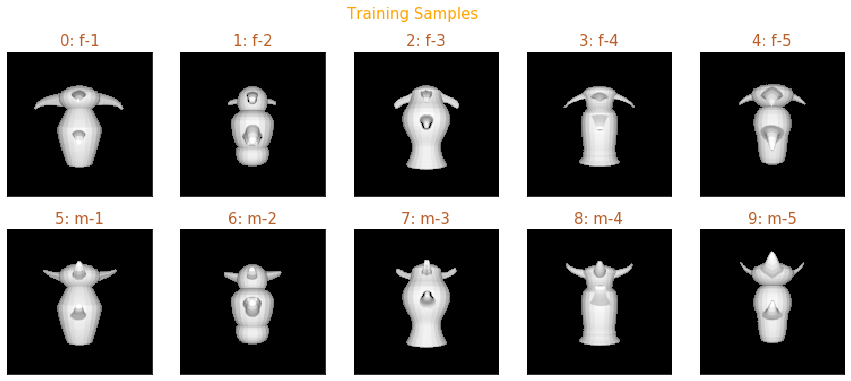

In [71]:
# img_size = 32
img_size = 128

render_util_folder = os.getcwd()
blender_folder = r"D:\Users\Enzo\Desktop\poke102938\School\RIT No Sync\Research\GAN\blender-2.78c-windows64" 

dataset_folder = r"D:\Users\Enzo\Desktop\poke102938\School\RIT No Sync\Research\GAN\greebles-generator-master\Greebles_3DS_10"
render_folder = os.path.join(os.getcwd(), "test_render") #FOLDER NAME

# Delete folder
if os.path.exists(render_folder) and os.path.isdir(render_folder):
    shutil.rmtree(render_folder)
    
if not os.path.isdir(dataset_folder):
    raise OSError(2, 'No such directory', str(dataset_folder))
if not os.path.exists(os.path.join(render_util_folder, 'render.py')):
    raise OSError(2, 'render.py not found', str(render_util_folder))

render_script = os.path.join(render_util_folder, 'render.py')

# Find the correct version of blender depending on the OS
if (platform.system() == "Windows"):
    blender_exec = os.path.join(blender_folder, 'blender.exe')
else:
    blender_exec = os.path.join(blender_folder, 'blender')
    
if not os.path.exists(os.path.join(blender_folder, blender_exec)):
    raise OSError(2, 'Blender executable not found', str(blender_folder))

# If you want to split command automatically
# import shlex; shlex.split("/bin/prog -i data.txt -o \"more data.txt\"")
# https://janakiev.com/blog/python-shell-commands/


set_mode = 'specific_all'
set_type = 'specific_angle'
#####################################
# Generate training set
blender_process = subprocess.run([blender_exec, '-b', '-P', render_script, '--', 
                    '-st', set_type, '-sm', set_mode, '-rp', render_folder, '-dp', dataset_folder, '-rm', 'none', '-pf', 'tensorflow',
                    '-is', str(img_size), '-ni', '1', '-xr', '0', '-yr', '0', '-zr', '0','--light_mode','behind_camera'])

# Move training set to folder                    
source_folder = os.path.join(render_folder, "greebles_tf-" + set_mode, set_type)
ltemp.move_to_folder(source_folder, os.path.join(source_folder, "train"))

###############################
(x_train, y_train) = ltemp.load_dataset_temp("train", source_folder)
x_train = np.array(x_train, dtype='float64')
y_train = np.array(y_train, dtype='float32')

# Make background the same color
x_train[x_train < 70] = 0
# x_train[x_train > 100] = 255

# x_train *= (1.0/255)
# x_train = (255-x_train)

labels = {0: 'f-1', 1: 'f-2', 2: 'f-3', 3: 'f-4', 4: 'f-5', 5: 'm-1', 6: 'm-2', 7: 'm-3', 8: 'm-4', 9: 'm-5'}

fig, axes = plt.subplots(2, 5, figsize=(15,6))
for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i][:,:,0], cmap='gray')
#     resized = cv2.resize(x_train[i], (32,32), interpolation = cv2.INTER_AREA)
#     ax.imshow(resized, cmap='gray', interpolation='nearest')
#     print(np.min(x_train[i]))
#     print(np.max(x_train[i]))
#     ax.imshow(x_train[i][:,:,0])
    true_label = np.argwhere(y_train[i] == 1).flatten()
    ax.set_title("{number}: {label}".format(label=labels[int(true_label)], number=i), fontsize=15, color='#ba5e27')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis=u'both', which=u'both', length=0)

fig.suptitle('Training Samples', fontsize=15, color='orange')

plt.show()

In [ ]:
# (x_train, y_train) = ltemp.load_dataset_temp("train", source_folder)
# x_train = np.array(x_train, dtype='float64')
# y_train = np.array(y_train, dtype='float32')

# x_train *= (1.0/255)

# labels = {0: 'f-1', 1: 'f-2', 2: 'f-3', 3: 'f-4', 4: 'f-5', 5: 'm-1', 6: 'm-2', 7: 'm-3', 8: 'm-4', 9: 'm-5'}

# fig, axes = plt.subplots(2, 5, figsize=(15,6))
# for i,ax in enumerate(axes.flat):
#     ax.imshow(x_train[i][:,:,0], cmap='gray')
#     true_label = np.argwhere(y_train[i] == 1).flatten()
#     ax.set_title("{number}: {label}".format(label=labels[int(true_label)], number=i), fontsize=15, color='#ba5e27')
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
#     ax.tick_params(axis=u'both', which=u'both', length=0)

# fig.suptitle('Training Samples', fontsize=15, color='orange')

# plt.show()